In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/Google_analytics.csv")

# Preview the data
print(df.head())

         fullVisitorId     visitId  visitNumber      date  pageviews  bounces  \
0   392023384739795652  1470741833            1  20160809          1      1.0   
1  5191567276496189639  1470785592            1  20160809          1      1.0   
2  5046789841958136083  1470736009            2  20160809          1      1.0   
3  1532449356654546269  1470772614            1  20160809          1      1.0   
4  3542024028000077259  1470777407            1  20160809          1      1.0   

                 source deviceCategory      country  
0                google        desktop       Russia  
1                google        desktop       Brazil  
2  analytics.google.com        desktop      Vietnam  
3              (direct)         tablet  Netherlands  
4                google        desktop       Norway  


In [2]:
df.rename(columns={
    'totals.pageviews': 'pageviews',
    'totals.bounces': 'bounces',
    'trafficSource.source': 'source',
    'device.deviceCategory': 'device',
    'geoNetwork.country': 'country'
}, inplace=True)

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fullVisitorId   1000 non-null   uint64 
 1   visitId         1000 non-null   int64  
 2   visitNumber     1000 non-null   int64  
 3   date            1000 non-null   int64  
 4   pageviews       1000 non-null   int64  
 5   bounces         132 non-null    float64
 6   source          1000 non-null   object 
 7   deviceCategory  1000 non-null   object 
 8   country         1000 non-null   object 
dtypes: float64(1), int64(4), object(3), uint64(1)
memory usage: 70.4+ KB
None
fullVisitorId       0
visitId             0
visitNumber         0
date                0
pageviews           0
bounces           868
source              0
deviceCategory      0
country             0
dtype: int64


In [4]:
df['pageviews'].fillna(0, inplace=True)
df['bounces'].fillna(0, inplace=True)

/tmp/ipython-input-4-2804029134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pageviews'].fillna(0, inplace=True)
/tmp/ipython-input-4-2804029134.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [5]:
# Ensure 'bounces' and 'pageviews' are numeric
df['bounces'] = pd.to_numeric(df['bounces'], errors='coerce')
df['pageviews'] = pd.to_numeric(df['pageviews'], errors='coerce')

# Drop rows where bounces or pageviews is NaN
df.dropna(subset=['bounces', 'pageviews'], inplace=True)

In [6]:
grouped = df.groupby('source').agg({
    'bounces': 'sum',
    'pageviews': 'sum',
    'fullVisitorId': 'count'  # acts as session count
}).rename(columns={'fullVisitorId': 'sessions'})

grouped['bounce_rate'] = grouped['bounces'] / grouped['sessions']
grouped = grouped.sort_values(by='bounce_rate', ascending=False)

print(grouped.head(10))

                      bounces  pageviews  sessions  bounce_rate
source                                                         
mail.aol.com              1.0          1         1     1.000000
calendar.google.com       1.0          4         2     0.500000
qiita.com                 1.0         15         3     0.333333
sites.google.com          3.0         32         9     0.333333
analytics.google.com      3.0         70        18     0.166667
(direct)                 71.0       2166       433     0.163972
google                   49.0       2079       417     0.117506
youtube.com               3.0        185        46     0.065217
facebook.com              0.0         15         2     0.000000
gatewaycdi.com            0.0          7         1     0.000000


In [9]:
device_group = df.groupby('deviceCategory').agg({
    'bounces': 'sum',
    'pageviews': 'sum',
    'fullVisitorId': 'count'
}).rename(columns={'fullVisitorId': 'sessions'})

device_group['bounce_rate'] = device_group['bounces'] / device_group['sessions']
print(device_group)

                bounces  pageviews  sessions  bounce_rate
deviceCategory                                           
desktop            95.0       3899       782     0.121483
mobile             36.0        881       193     0.186528
tablet              1.0        147        25     0.040000


/tmp/ipython-input-10-2912865907.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bounce_rate', y='source', data=grouped.head(10), palette='coolwarm')


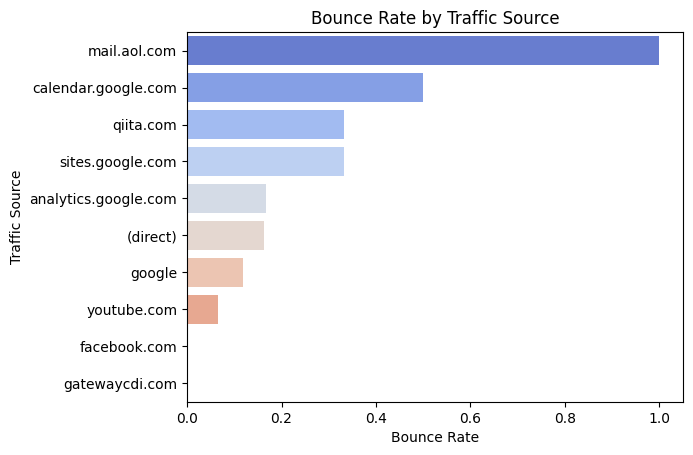

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index for plotting
grouped = grouped.reset_index()

sns.barplot(x='bounce_rate', y='source', data=grouped.head(10), palette='coolwarm')
plt.title('Bounce Rate by Traffic Source')
plt.xlabel('Bounce Rate')
plt.ylabel('Traffic Source')
plt.show()

/tmp/ipython-input-13-2235506200.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped.head(10), x='bounce_rate', y='source', palette='coolwarm')


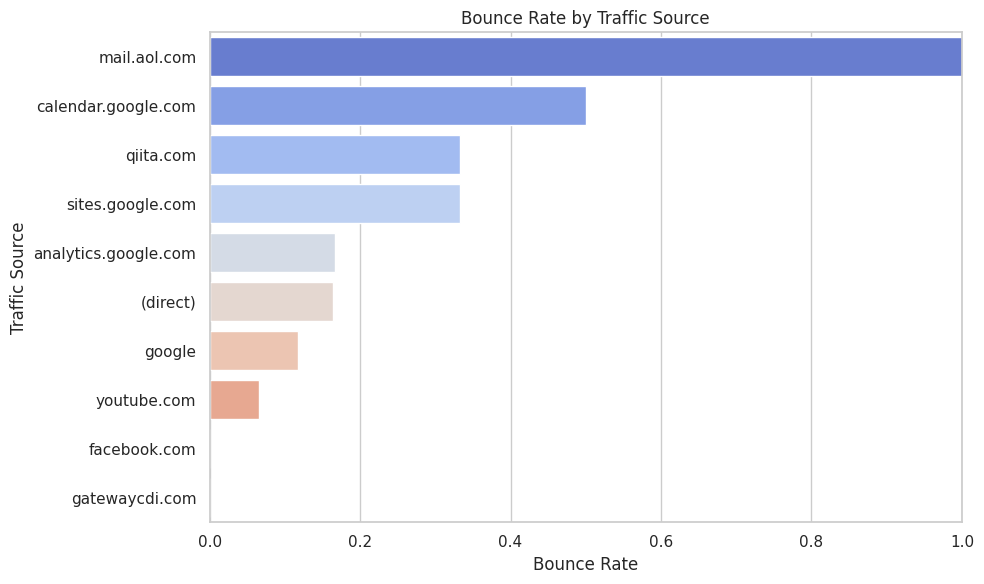

In [13]:
sns.set_theme(style="whitegrid")
# Reset index so 'source' becomes a column
grouped = grouped.reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped.head(10), x='bounce_rate', y='source', palette='coolwarm')
plt.title('Bounce Rate by Traffic Source')
plt.xlabel('Bounce Rate')
plt.ylabel('Traffic Source')
plt.xlim(0, 1)  # Bounce rate is between 0 and 1
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-4110589040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_group, x='deviceCategory', y='bounce_rate', palette='viridis')


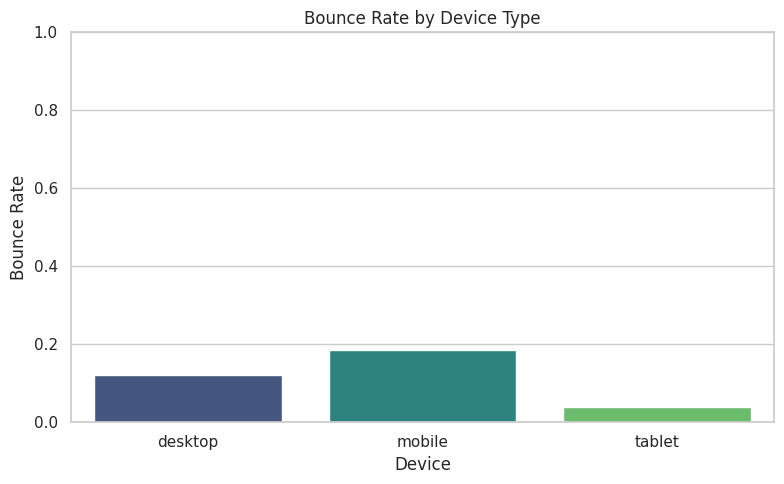

In [15]:
# If you've created device_group DataFrame
device_group = device_group.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=device_group, x='deviceCategory', y='bounce_rate', palette='viridis')
plt.title('Bounce Rate by Device Type')
plt.ylabel('Bounce Rate')
plt.xlabel('Device')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

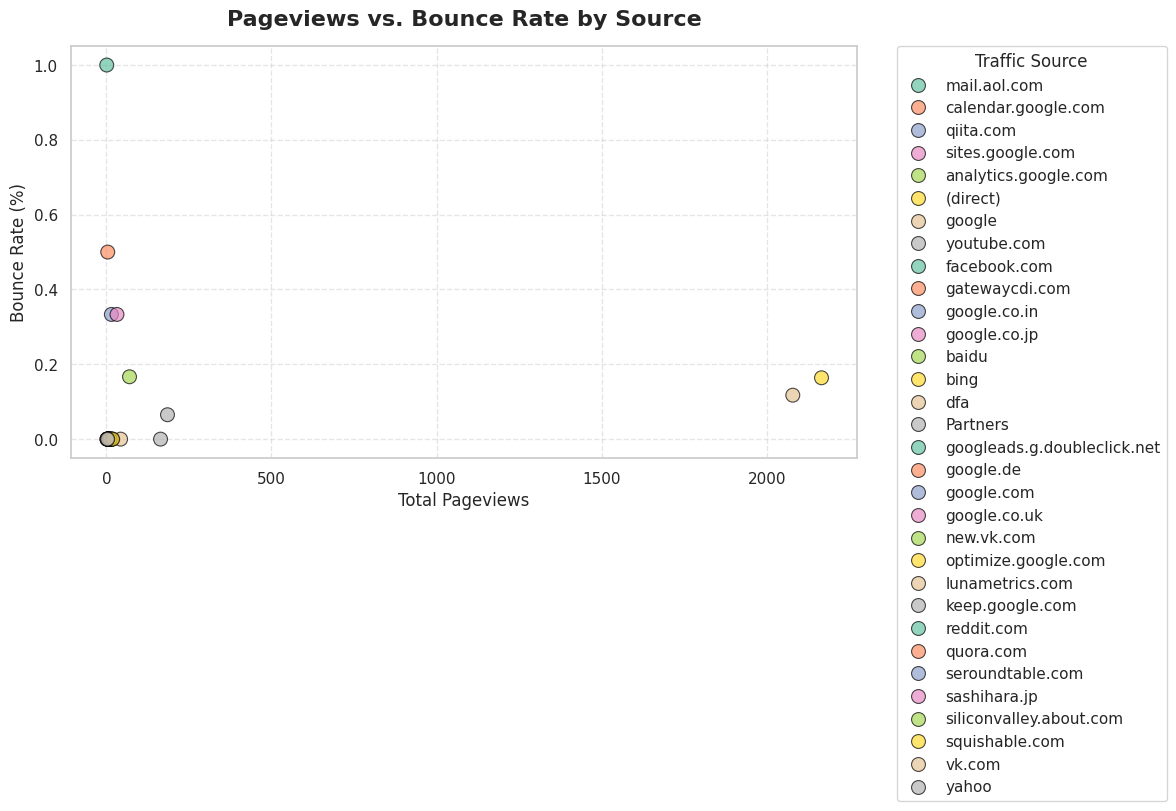

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Scatter plot with better aesthetics
scatter = sns.scatterplot(
    data=grouped,
    x='pageviews',
    y='bounce_rate',
    hue='source',
    palette='Set2',
    s=100,                     # Increase marker size for clarity
    alpha=0.7,                 # Slight transparency
    edgecolor='black'         # Adds contrast to markers
)

# Add title and axis labels with styling
plt.title('Pageviews vs. Bounce Rate by Source', fontsize=16, weight='bold', pad=15)
plt.xlabel('Total Pageviews', fontsize=12)
plt.ylabel('Bounce Rate (%)', fontsize=12)

# Improve legend appearance
plt.legend(title='Traffic Source', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Make layout tight and add grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()


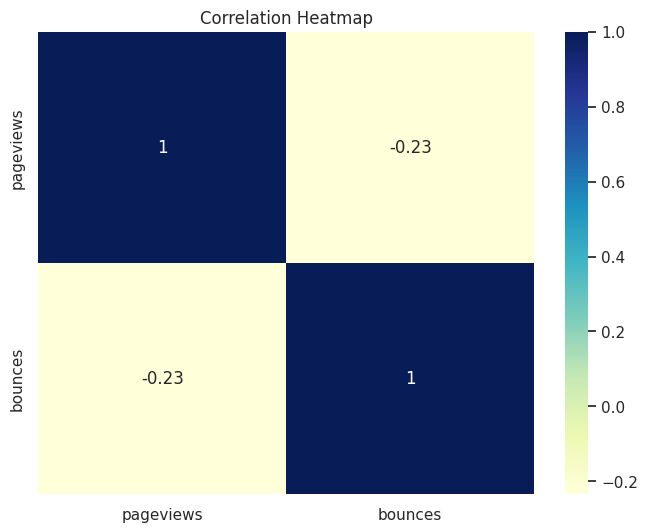

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['pageviews', 'bounces']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
import numpy as np
from scipy.stats import ttest_ind

# Simulate 1000 users: 1 = converted, 0 = didn't convert
np.random.seed(42)  # for reproducibility
control = np.random.binomial(n=1, p=0.04, size=1000)  # 4% conversion rate
variant = np.random.binomial(n=1, p=0.06, size=1000)  # 6% conversion rate

# Calculate conversion rates
control_rate = control.mean()
variant_rate = variant.mean()

print(f"Control Conversion Rate: {control_rate:.4f}")
print(f"Variant Conversion Rate: {variant_rate:.4f}")

Control Conversion Rate: 0.0380
Variant Conversion Rate: 0.0680


In [19]:
t_stat, p_value = ttest_ind(control, variant)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: -2.9995
P-Value: 0.0027


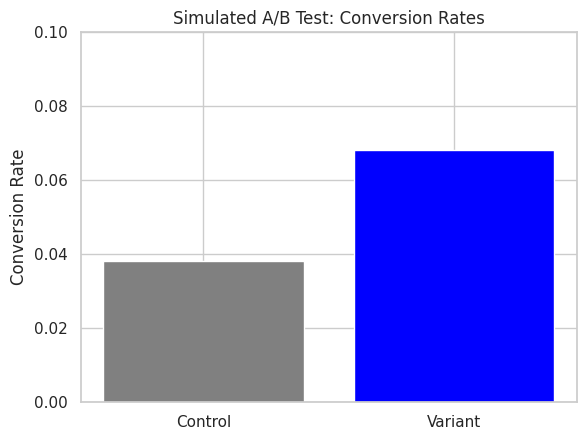

In [20]:
import matplotlib.pyplot as plt

plt.bar(['Control', 'Variant'], [control_rate, variant_rate], color=['gray', 'blue'])
plt.title('Simulated A/B Test: Conversion Rates')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.1)
plt.show()